In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the data, split between train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Coresponding class of the image:  5


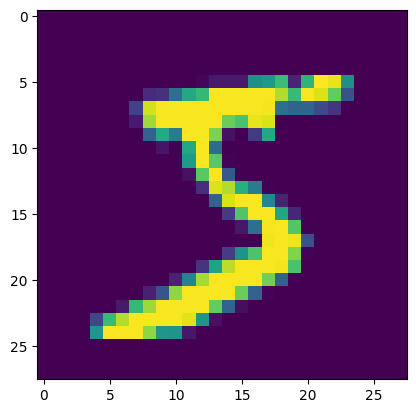

In [4]:
# plot the image
plt.imshow(x_train[0])
print("Coresponding class of the image: ", y_train[0])

In [5]:
#prepare dataset
x_train = x_train.reshape([60000, 28 * 28])
x_test = x_test.reshape([10000, 28 * 28])

x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
input_shape = (img_rows)

In [6]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
#one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
#Create ANN
model = Sequential()
#Input layer
model.add(Dense(128, activation='relu', input_shape=(784, )))
#Hidden layer
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

#Output layer
model.add(Dense(10, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#Define optimizer
adam = keras.optimizers.Adam(learning_rate = 0.0001)

In [16]:
#Loss function
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

In [17]:
#Train the model
history = model.fit(x_train, y_train,
          batch_size = 128,
          epochs= 12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 8s 6ms/step - loss: 1.0583 - accuracy: 0.7122 - val_loss: 0.4112 - val_accuracy: 0.8970
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 0.3372 - accuracy: 0.9098 - val_loss: 0.2729 - val_accuracy: 0.9227
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2585 - accuracy: 0.9270 - val_loss: 0.2280 - val_accuracy: 0.9329
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 0.2222 - accuracy: 0.9363 - val_loss: 0.2025 - val_accuracy: 0.9419
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.1970 - accuracy: 0.9435 - val_loss: 0.1844 - val_accuracy: 0.9464
Epoch 6/12
469/469 [==============================] - 5s 10ms/step - loss: 0.1782 - accuracy: 0.9486 - val_loss: 0.1696 - val_accuracy: 0.9511
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.1638 - accuracy: 0.9534 - val_loss: 0.1587 - val_accuracy: 0.9549
Epoch

In [18]:
model.save("./model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12676383554935455
Test accuracy: 0.9639000296592712


In [20]:
test_data = x_test[0].reshape(1, 784)
test_data.shape

(1, 784)

In [21]:
predict = model.predict(test_data)
predict = np.argmax(predict, axis=1)
predict

1/1 [==============================] - 0s 79ms/step


array([7])